In [0]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris=load_iris()

In [223]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [224]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [225]:
df=pd.DataFrame(iris.data, columns=['sepal_len','sepal_width','petal_len','petal_width'])
df.head()

,sepal_len,sepal_width,petal_len,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [226]:
df['species']=iris.target
df

,sepal_len,sepal_width,petal_len,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [227]:
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

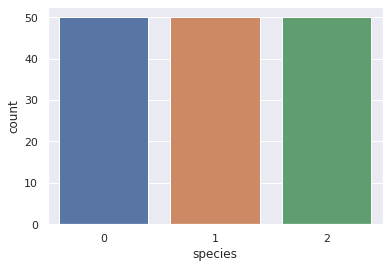

In [228]:
sns.countplot(x=df['species'], data=df)
plt.show()

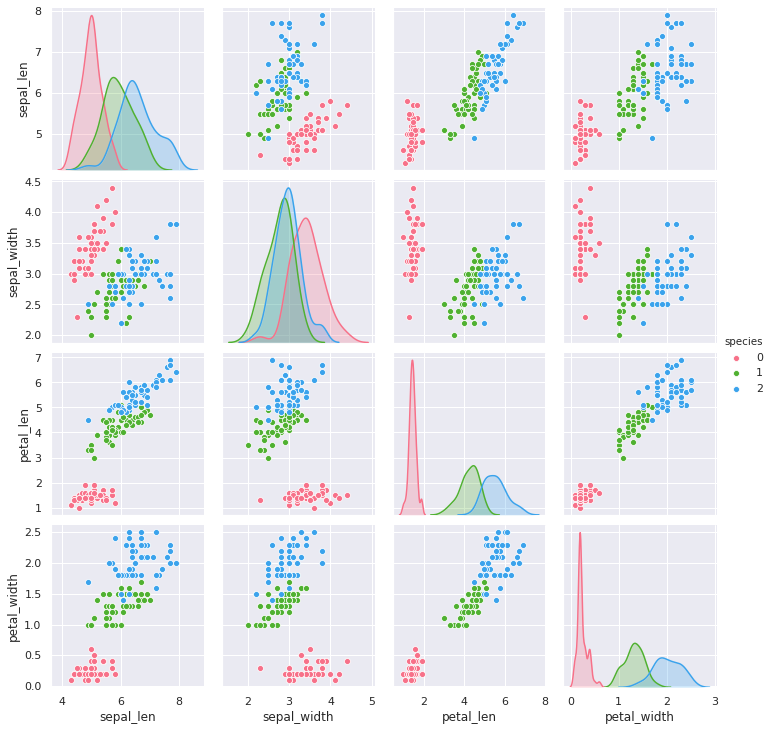

In [229]:
sns.pairplot(data=df, hue='species', palette='husl')

In [230]:
corr=df.corr().round(2)
corr

,sepal_len,sepal_width,petal_len,petal_width,species
sepal_len,1.00,-0.12,0.87,0.82,0.78
sepal_width,-0.12,1.00,-0.43,-0.37,-0.43
petal_len,0.87,-0.43,1.00,0.96,0.95
petal_width,0.82,-0.37,0.96,1.00,0.96
species,0.78,-0.43,0.95,0.96,1.00


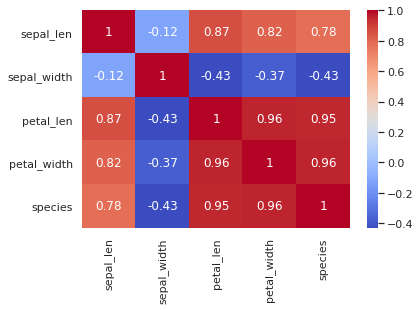

In [231]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

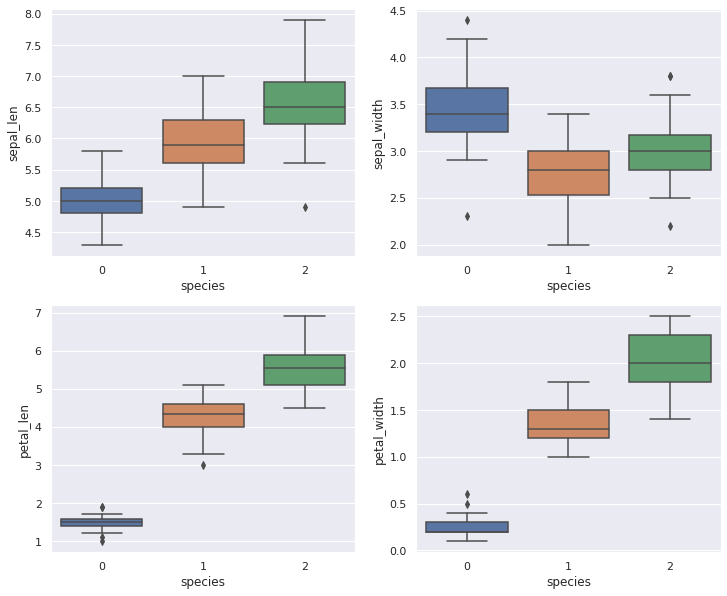

In [232]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_len',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_len',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=df)
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
y=df['species']
x=df.drop(['species'],axis=1)

In [235]:
print(type(x))
print(x.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(150, 4)
<class 'pandas.core.series.Series'>
(150,)


In [236]:
print(x)

     sepal_len  sepal_width  petal_len  petal_width
0          5.1          3.5        1.4          0.2
1          4.9          3.0        1.4          0.2
2          4.7          3.2        1.3          0.2
3          4.6          3.1        1.5          0.2
4          5.0          3.6        1.4          0.2
..         ...          ...        ...          ...
145        6.7          3.0        5.2          2.3
146        6.3          2.5        5.0          1.9
147        6.5          3.0        5.2          2.0
148        6.2          3.4        5.4          2.3
149        5.9          3.0        5.1          1.8

[150 rows x 4 columns]


In [237]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=6)

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

In [240]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [241]:
y_pred=knn.predict(x_test)
y_pred

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1,
       0])

In [242]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

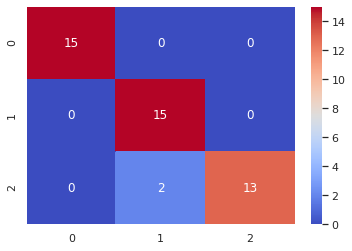

In [243]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True , cmap='coolwarm')

In [244]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.9555555555555556